 Clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


## 1.2 Task1: K-means

Run this cell to read and display top 5 rows of data

In [3]:
cluster_data = pd.read_csv("healthcare-dataset.csv")
cluster_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,clusters
0,1,67.0,0,1,1,2,228.69,36.600000,2
1,0,61.0,0,0,1,3,202.21,28.893237,0
2,1,80.0,0,1,1,2,105.92,32.500000,2
3,0,49.0,0,0,1,2,171.23,34.400000,0
4,0,79.0,1,0,1,3,174.12,24.000000,3


### 1.2.1 Part 1A: 
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

In [4]:
cluster_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
clusters             0
dtype: int64

**Observation** : No Missing data in any column

Comment your action here:

The existing dataset is devoid of any missing values.

If there is missing data, the approach can involve either imputing the absent values or removing entire rows. The choice between these options is contingent upon the nature of the data and the problem statement. Opting for imputation entails employing one of the following methods, which hinges on the type of missing data and the specific problem at hand:

Standard imputation methods: Substitute missing values with aggregate statistics such as mean, median, etc.
Simulate missing values by selecting data without missing information and constructing models to replace the absent values.
Employ the Soft Compute Method.

In [5]:
dup = cluster_data[cluster_data.duplicated(keep=False)]
dup.count()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
clusters             0
dtype: int64

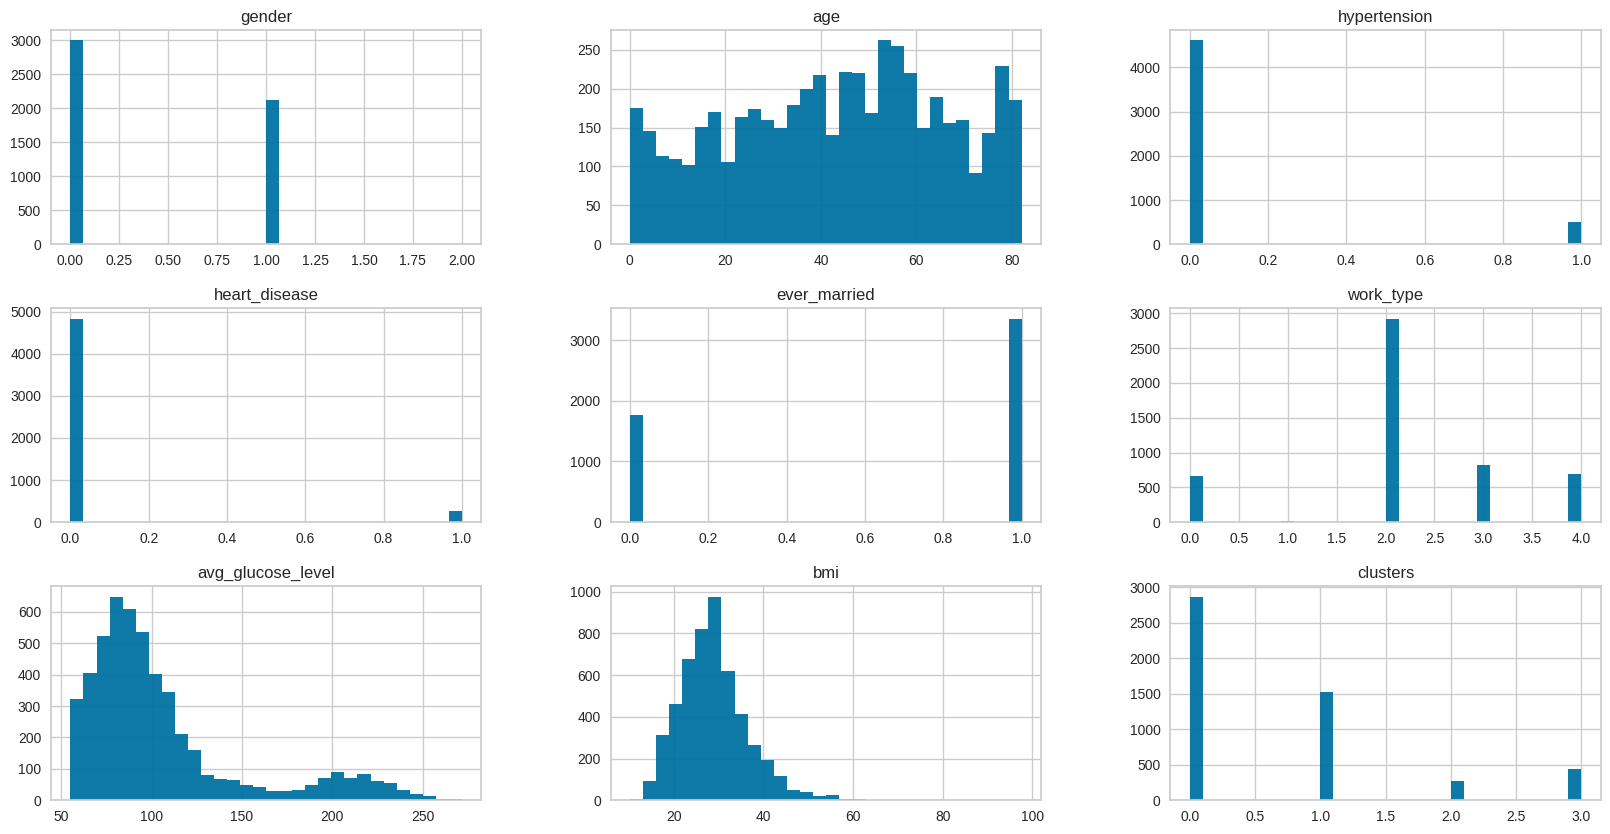

In [6]:
cluster_data.hist(figsize=(20,10),bins=30,alpha=0.95)
plt.show()

## **1.2.2 Part 1B: **


Map the categorical data for further processing.

##### **As K Means is a distance-based algorithm that works with numerical data, We can drop non-numerical columns**

In [7]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                5110 non-null   float64
 8   clusters           5110 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 359.4 KB


# From the above, we can see there is no non-numerical column


## **1.2.3 Part 1B: **


Scale the data for further processing. Display the processed data. Explain your actions.

#### **Scaling**

In [8]:
# Explain your actions
# Since k-Means entails repetitive calculations of distances (e.g., Euclidean) and assigning data points to their nearest centroids, features with large scales could introduce bias into these computations.
#Therefore, it is crucial to perform scaling, and the choice of scaling method depends on the characteristics of the data and the specific requirements.
scaler = StandardScaler()
scale_data = scaler.fit_transform(cluster_data)
df = pd.DataFrame(scale_data, columns=cluster_data.columns)
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,clusters
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,2.706375,1.001234e+00,1.458661
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,2.121559,1.846221e-15,-0.721757
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-0.005028,4.685773e-01,1.458661
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,1.437358,7.154182e-01,-0.721757
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,1.501184,-6.357112e-01,2.548871


Text(0, 0.5, 'Value')

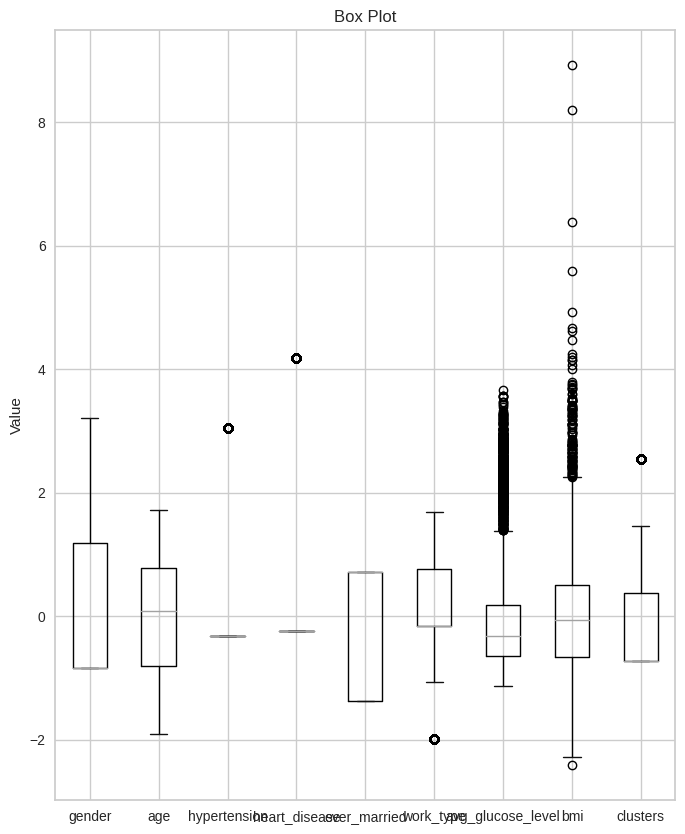

In [9]:
fig, ax = plt.subplots(figsize=(8, 10))
df.boxplot(ax=ax)

ax.set_title('Box Plot')
ax.set_ylabel('Value')

In [10]:
## Given the abundance of outliers in the data, opting for a robust scaler is advisable.

scaler = RobustScaler()
data_scaled = scaler.fit_transform(cluster_data)
df = pd.DataFrame(data_scaled, columns=cluster_data.columns)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,clusters
0,1.0,0.611111,0.0,1.0,0.0,0.0,3.712987,0.911111,2.0
1,0.0,0.444444,0.0,0.0,0.0,1.0,2.994300,0.054804,0.0
2,1.0,0.972222,0.0,1.0,0.0,0.0,0.380920,0.455556,2.0
3,0.0,0.111111,0.0,0.0,0.0,0.0,2.153481,0.666667,0.0
4,0.0,0.944444,1.0,0.0,0.0,1.0,2.231917,-0.488889,3.0


Text(0, 0.5, 'Value')

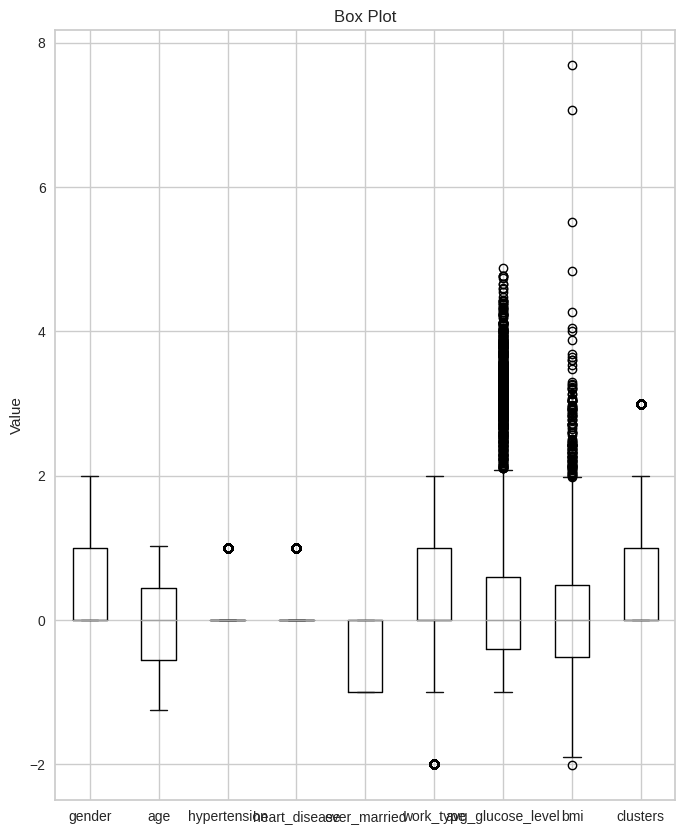

In [11]:
fig, ax = plt.subplots(figsize=(8, 10))
df.boxplot(ax=ax)

ax.set_title('Box Plot')
ax.set_ylabel('Value')

##It is evident that the Robust Scaler did not remove outliers; instead, it scales the data in a manner that mitigates the influence of outliers.

## Removing outliers is not considered for our current project.##

## **1.2.4 Part 1C: **
**In this task, you will be using the elbow method to determine the optimal number of clusters for
k-means clustering.**

**We need some way to determine whether we are using the right number of clusters when using
k-means clustering. One method to validate the number of clusters is the elbow method.**

**For this task, you need to perform the elbow method for k from 2 to 7 and plot a line chart of the
SSE for each value of k, and determine the best k (the number of clusters).
Explain from the graph which is the most appropriate value for k.**

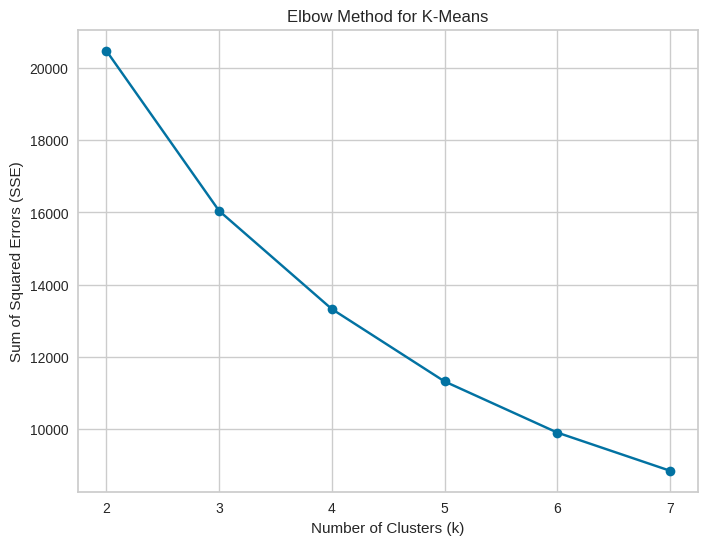

In [12]:
# Perform the elbow method for k from 2 to 7
sse = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10, random_state=123)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE values against k values
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), sse, marker='o')  # Adjusted the range for x-axis
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(2, 8))  # Adjusted the range for x-axis ticks
plt.grid(True)
plt.show()


The objective is to determine the optimal value for k, identified at the elbow point where the decrease in the sum of squared errors is not significantly pronounced with an increasing number of clusters. Selecting a higher k value may lead to overfitting the data. Examining the graph, it is evident that after the 5th cluster, the rate of SSE reduction diminishes noticeably. Therefore, 5 is deemed the most suitable value for k. This conclusion can be further validated using the KElbowVisualizer.

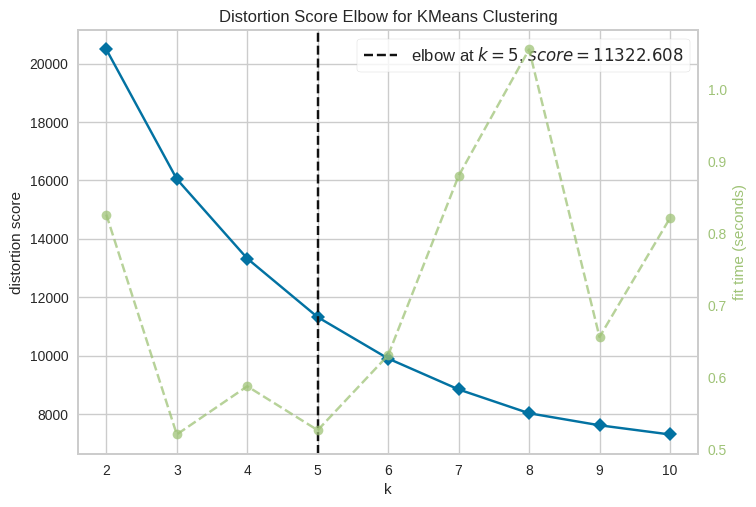

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
kmeans.fit(data_scaled)
elbow_kmeans=KElbowVisualizer(kmeans)
elbow_kmeans.fit(data_scaled)
elbow_kmeans.show()

 From the above analysis it can be concluded that most appropriate value for k using elbow method is '5'

## **1.2.5 Part 1D: **

The elbow method gives an idea for which can be the most appropriate value for k. However, for
cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation
distance between the resulting clusters. The silhouette average value displays a measure of how
close in average each point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible.
And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-7). Explain
which K value you selected from the results and why?

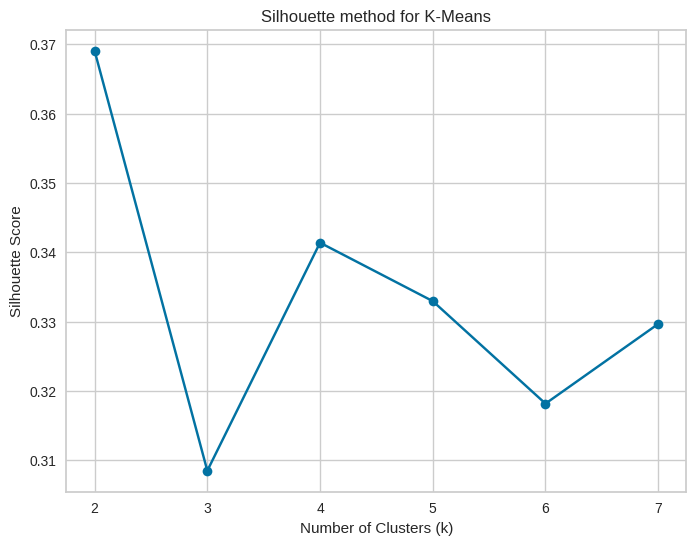

k = 2: Silhouette Score = 0.36906133326461393
k = 3: Silhouette Score = 0.3085024862495194
k = 4: Silhouette Score = 0.3413810372259507
k = 5: Silhouette Score = 0.33295526506917406
k = 6: Silhouette Score = 0.31817652750806125
k = 7: Silhouette Score = 0.329669473656386


In [14]:
from sklearn.metrics import silhouette_score

# Perform silhouette analysis for k from 2 to 7 with modified parameter names
silhouette_scores_modified = []

for k_modified in range(2, 8):
    kmeans_modified = KMeans(n_clusters=k_modified, init='k-means++', max_iter=1000, n_init=10, random_state=123)
    cluster_labels_modified = kmeans_modified.fit_predict(data_scaled)
    silhouette_avg_modified = silhouette_score(data_scaled, cluster_labels_modified)
    silhouette_scores_modified.append(silhouette_avg_modified)

# Plot silhouette scores for each k value from 2 to 7
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), silhouette_scores_modified, marker='o')  # Adjusted the range for x-axis
plt.title('Silhouette method for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Print silhouette scores for each k value
for k_modified, score_modified in zip(range(2, 8), silhouette_scores_modified):
    print(f'k = {k_modified}: Silhouette Score = {score_modified}')


The primary goal of K-Means is to create clusters where data points within a cluster exhibit significant dissimilarity from those in other clusters but demonstrate similarity among themselves. As outlined in the task description, the Silhouette Score spans from -1 to 1, where a higher score indicates a more suitable choice for k. A high silhouette score, approaching +1, signifies effective clustering, while a low score, nearing -1, implies misassignment of data points to incorrect clusters. Clearly, K=2 achieves the highest Silhouette Score, indicating that it might be the appropriate number of clusters based on this evaluation method.

## **1.2.6 Part 1E:**
With the best K value use K-means algorithm on the data. Print out the whole data along with
the cluster labels assigned for each row in the form of new column.

As we got different k-values in both the methods, let's check the visualizations to see if these clusters are meaningful

In [15]:
def kmeans(data, num_clusters):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=123)
    data['ClusterNo'] = kmeans_model.fit_predict(data)
    return data

def perform_pca(data, k_clusters):
    pca_model = PCA(n_components=2)
    pca_features = pca_model.fit_transform(data.drop('ClusterNo', axis=1))
    plt.figure(figsize=(10, 6))
    for cluster_no in range(k_clusters):
        cluster_data = pca_features[data['ClusterNo'] == cluster_no]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_no}')
        plt.xlabel('PCA Dimension 1')
        plt.ylabel('PCA Dimension 2')
        plt.title('K-means Clustering Result in 2D')
        plt.legend()
        plt.grid()
    return plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


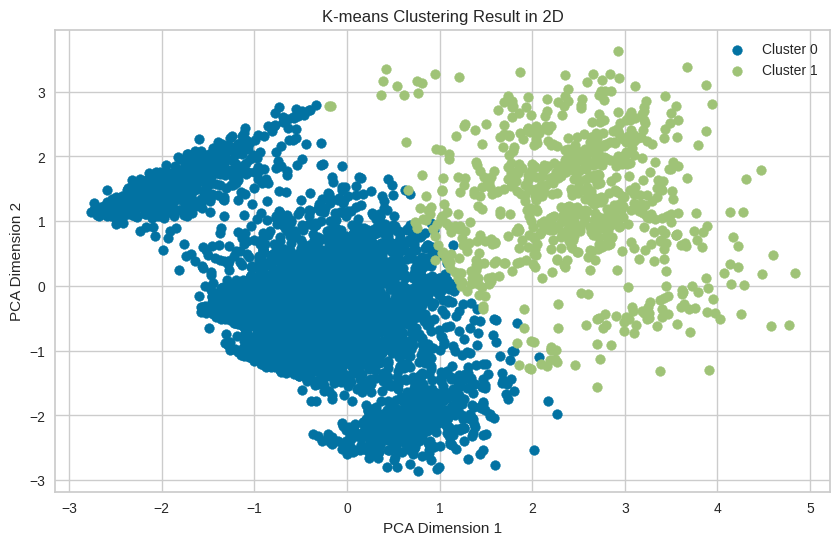

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


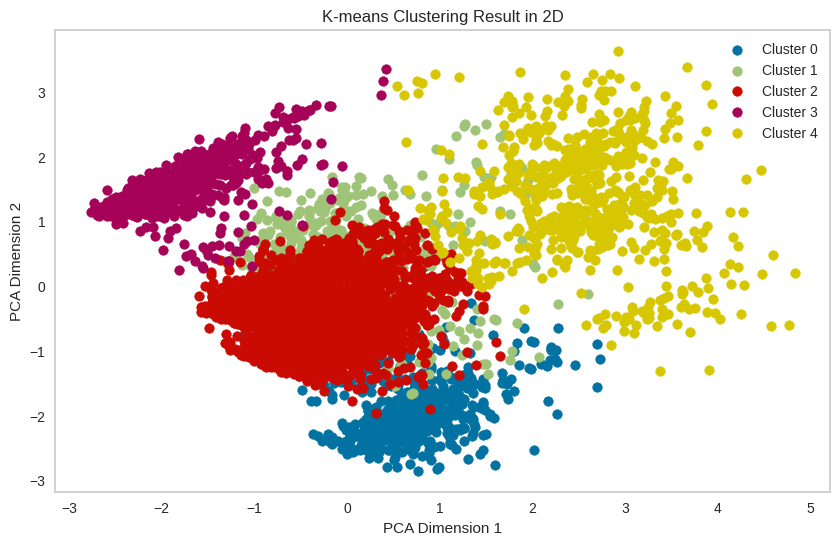

In [16]:


test_data = df.copy()

# Perform k-means clustering with 2 clusters
df_result_1 = kmeans(test_data, num_clusters=2)
perform_pca(df_result_1, k_clusters=2)



test_data = df.copy()
# Perform k-means clustering with 5 clusters
df_result_2 = kmeans(test_data, num_clusters=5)
perform_pca(df_result_2, k_clusters=5)


The graphs above distinctly reveal that when k=5, the boundaries of the clusters are unclear, whereas the clusters are easily distinguishable with k=2. Therefore, let's opt for k=2 for our model.

In [17]:

df_cluster2 = kmeans(df,2)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Trying to print the entire data with cluster labels
print(df_cluster2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      gender       age  hypertension  heart_disease  ever_married  work_type  \
0        1.0  0.611111           0.0            1.0           0.0        0.0   
1        0.0  0.444444           0.0            0.0           0.0        1.0   
2        1.0  0.972222           0.0            1.0           0.0        0.0   
3        0.0  0.111111           0.0            0.0           0.0        0.0   
4        0.0  0.944444           1.0            0.0           0.0        1.0   
5        1.0  1.000000           0.0            0.0           0.0        0.0   
6        1.0  0.805556           1.0            1.0           0.0        0.0   
7        0.0  0.666667           0.0            0.0          -1.0        0.0   
8        0.0  0.388889           0.0            0.0           0.0        0.0   
9        0.0  0.916667           0.0            0.0           0.0        0.0   
10       0.0  1.000000           1.0            0.0           0.0        0.0   
11       0.0  0.444444           0.0    

## **1.2.7 Part 1F: **
For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!


Most importantly, interpret the results that you just displayed. Interpret, do not read out the
results again!

In [18]:
cluster_avg = df.groupby('ClusterNo').mean()

# Display the cluster means
print(cluster_avg)

             gender       age  hypertension  heart_disease  ever_married  \
ClusterNo                                                                  
0          0.403657 -0.123210       0.07200       0.037486      -0.38080   
1          0.477551  0.390916       0.24898       0.152381      -0.12381   

           work_type  avg_glucose_level       bmi  clusters  
ClusterNo                                                    
0           0.205486          -0.054736 -0.017735  0.608229  
1          -0.057143           3.017069  0.486585  0.982313  



> Let's keep our results in a table to understand how different/similar these clusters are

In [19]:
cluster_avg

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,clusters
ClusterNo,,,,,,,,,
0,0.403657,-0.123210,0.07200,0.037486,-0.38080,0.205486,-0.054736,-0.017735,0.608229
1,0.477551,0.390916,0.24898,0.152381,-0.12381,-0.057143,3.017069,0.486585,0.982313


**ClusterNo 0:**

Demographics: Skewed towards a specific gender, indicating a dominant gender within this cluster.

Age: Slightly below the mean, signifying a relatively younger population.

Health Indicators: Moderate levels of hypertension and heart disease.

Marital Status: Lower probability of being ever married.

Work Preference: Positive indication for a specific work type.

**ClusterNo 1:**

Demographics: Skewed towards a different gender, suggesting a distinctive gender distribution.

Age: Above the mean, indicating an older population.

Health Indicators: Elevated prevalence of hypertension and heart disease.

Marital Status: Lower probability of being ever married.

Work Preference: Negative indication for work type, implying a different preference.

Health Metrics: Substantially higher average glucose levels and BMI.

**Analysis:**

Cluster Distinction: Clear disparities exist in demographics, age distribution, health indicators, marital status, and work preferences between the two clusters.

Health Observations: ClusterNo 1 indicates heightened health risks with elevated glucose levels and BMI, hinting at a potentially older population with more prevalent health conditions.

Targeted Approaches: Understanding these clusters allows for precise health interventions or services tailored to specific age groups and health profiles.

Business Considerations: Insights into work preferences may influence workplace policies or marketing strategies aimed at distinct demographic segments.

Model Enhancement: There is potential for refining the model further to improve cluster distinctions and capture more nuanced patterns in the data.

In conclusion, this analysis fosters a data-driven comprehension of demographic and health trends, offering valuable insights for targeted interventions and strategic decisions in business settings.

## **1.3 Task2: Hierarchical Clustering**

Simply run the cell to read the data and plot it.

In [21]:
#importing data from csv file
import pandas as pd
data = pd.read_csv("hierarchical_data.csv")
data.head()

,X,Y
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699


## **1.3.1 Part 2A: **

Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

<Axes: >

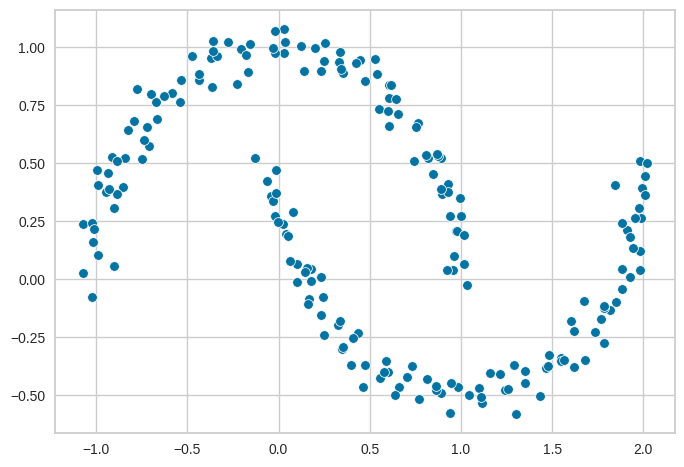

In [22]:
#plotting data using scatter plot in matplotlib library
import seaborn as sns
sns.scatterplot(x=data.X.values, y=data.Y.values, alpha=0.99)


Data is distributed between -1 and 2 on both the axes.
This data represents a 2d plane with 0 at its center and data points distributed in all sides.
We can infer from the graph that the data points could be clustered into 4 groups just like 4 quadranrs in a 2d plane with 0 as center.

## **1.3.2 Part 2B: **
Using Hierarchical clustering with euclidean + average and manhattan + average, plot the results
for clusters 2 and 3. Add title for each plot.
INTERPRET the results for each combination!

In [23]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering


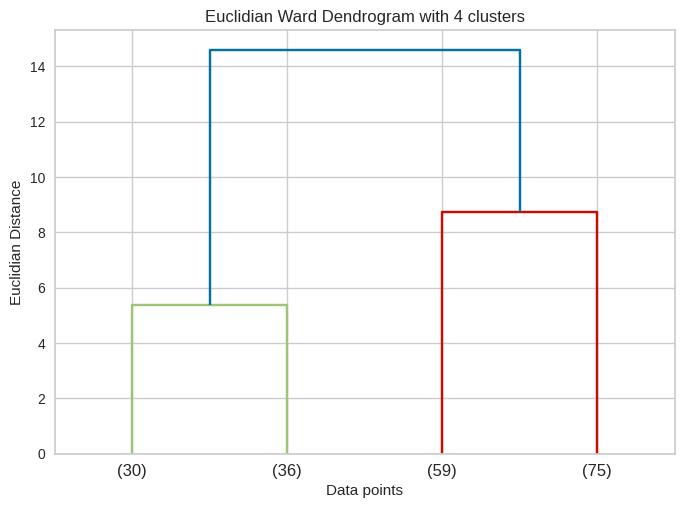

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


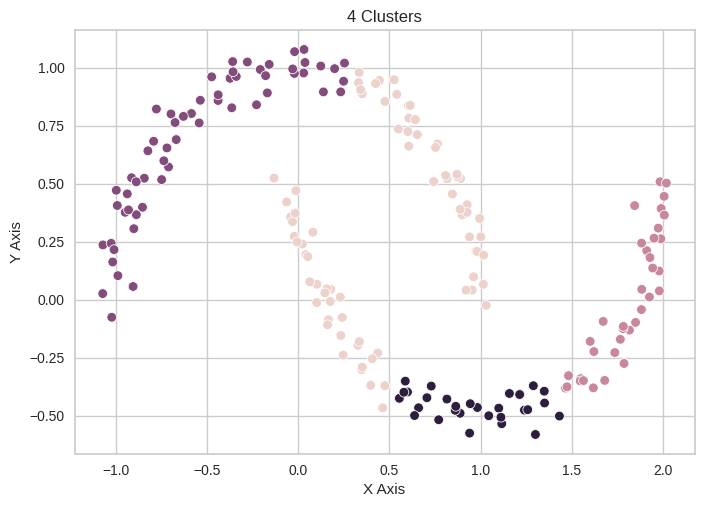

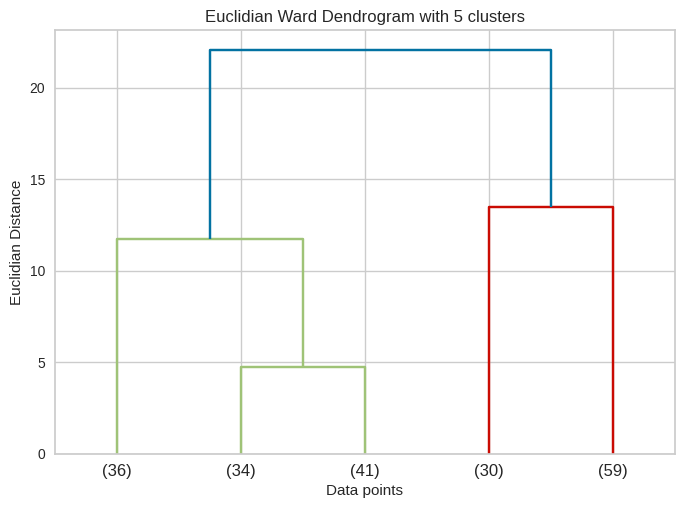

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


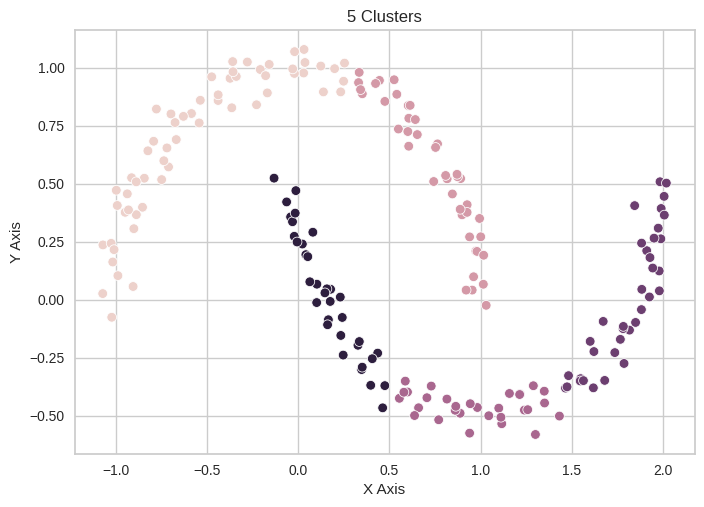

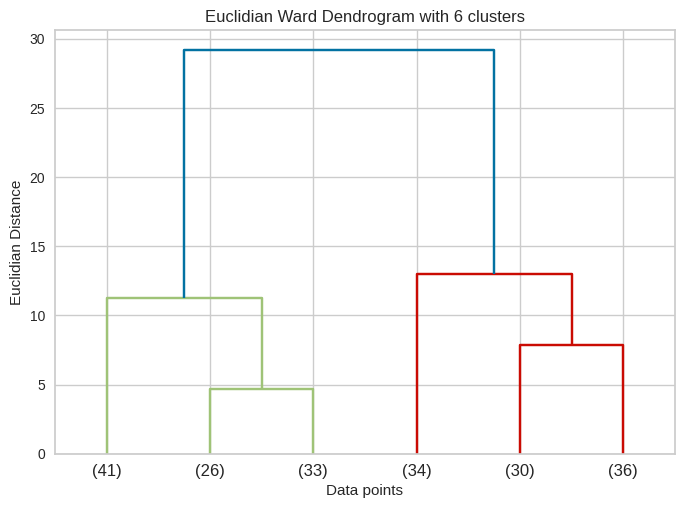

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


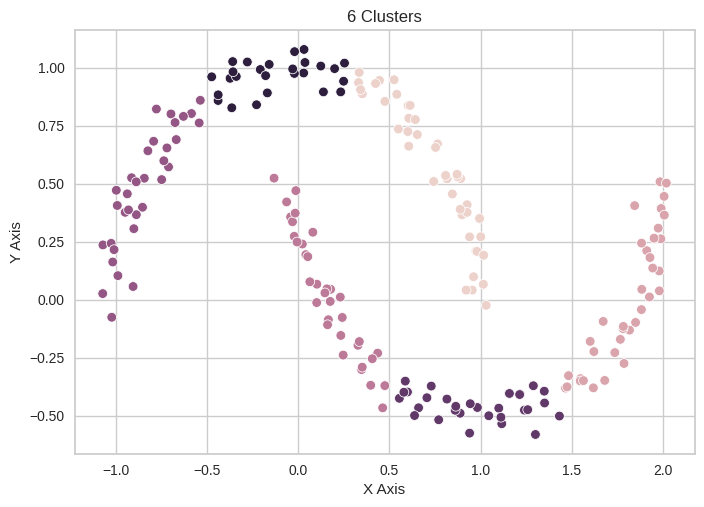

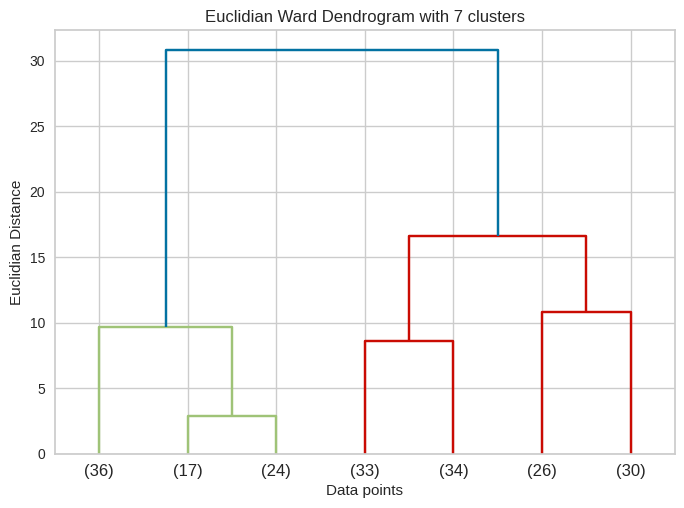

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


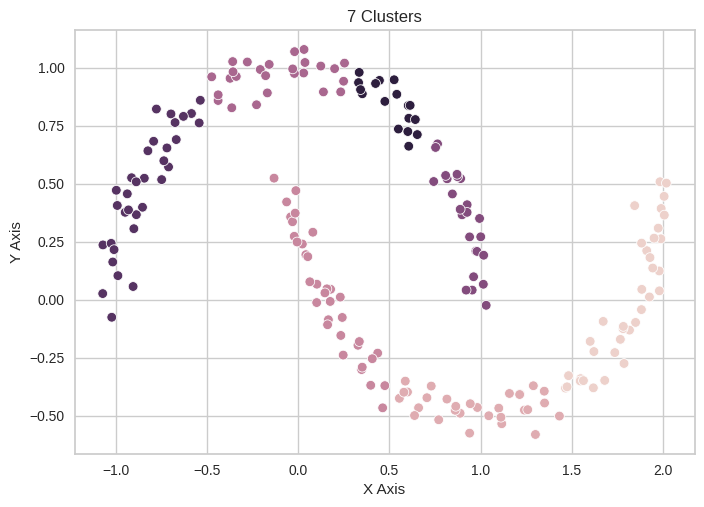

In [24]:
# Hierarchical clustering with Euclidean distance and Ward linkage
for number in [4,5,6,7]:
  euclid_ward = linkage(data, method='ward', metric='euclidean')
  plt.title('Euclidian Ward Dendrogram with '+ str(number) + ' clusters')
  dendrogram(euclid_ward,p=number,truncate_mode='lastp')
  plt.xlabel('Data points')
  plt.ylabel('Euclidian Distance')
  plt.show()

  ew_clust= AgglomerativeClustering(n_clusters=number, affinity="euclidean", linkage="ward")
  data4=data
  ew_clust.fit(data4.values)
  data4["Cluster_Number_ew"] = ew_clust.labels_
  plt.title(str(number) +' Clusters')
  sns.scatterplot(x="X", y="Y", data=data, hue="Cluster_Number_ew",legend=False,alpha=1)
  plt.xlabel('X Axis')
  plt.ylabel('Y Axis')
  plt.show()
  print("====================================================================================================================================================")
  print("====================================================================================================================================================")
  print("====================================================================================================================================================")

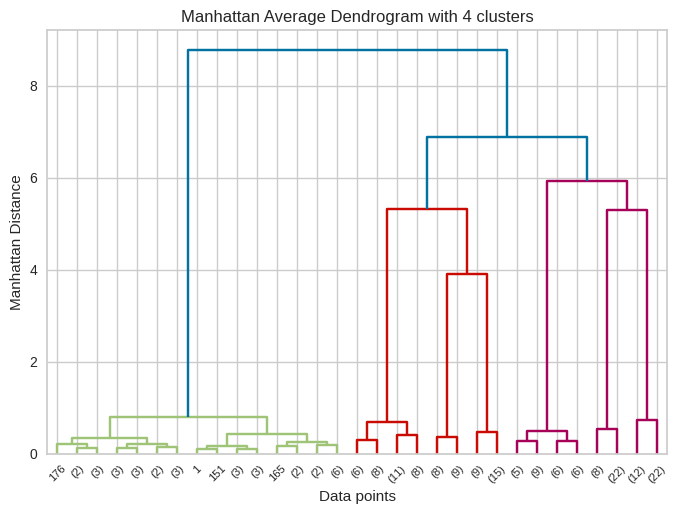

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


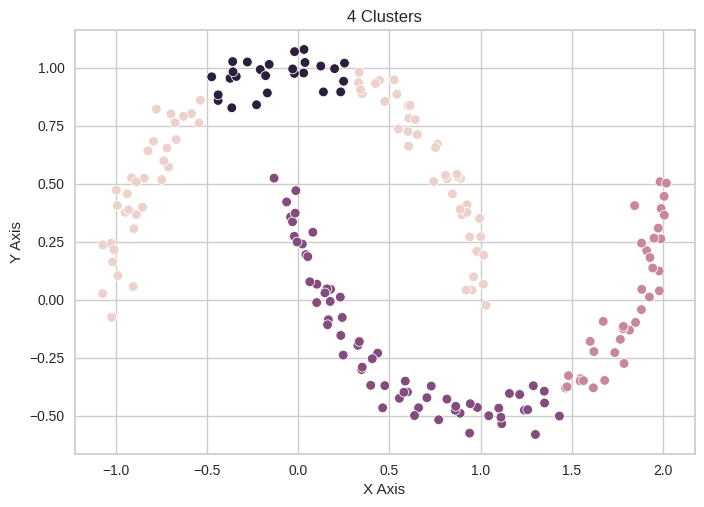

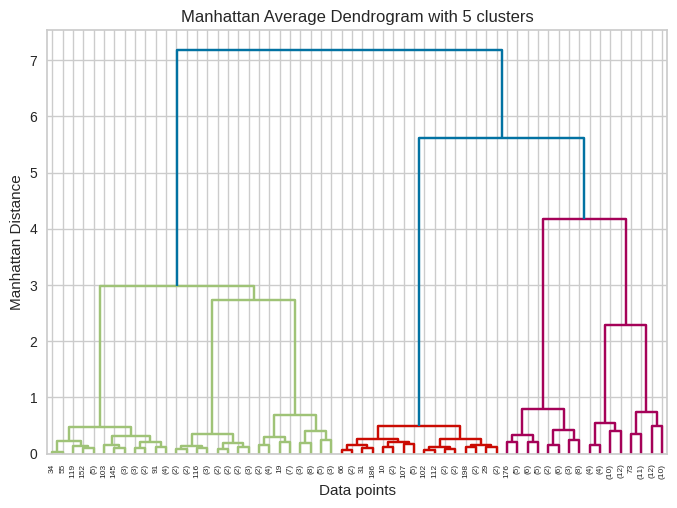

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


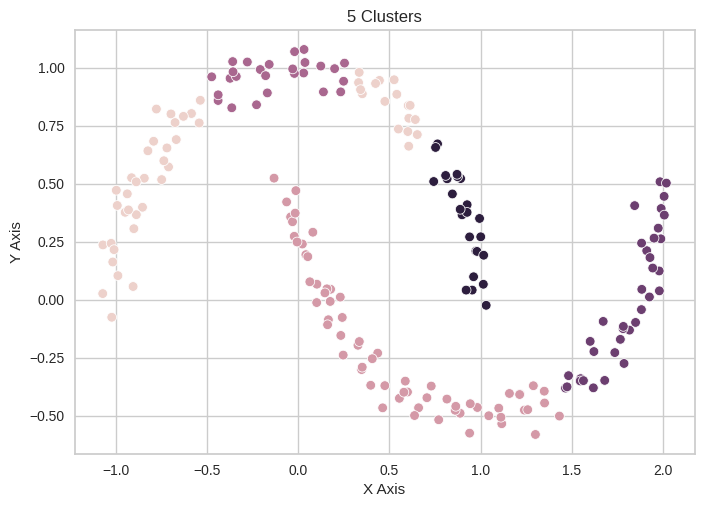

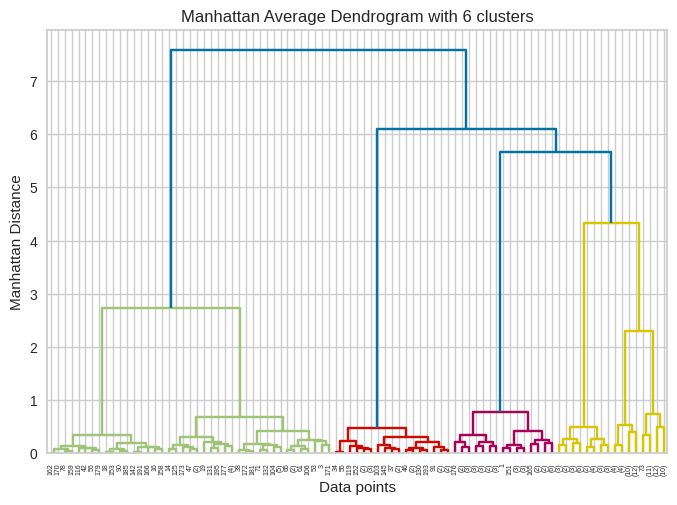

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


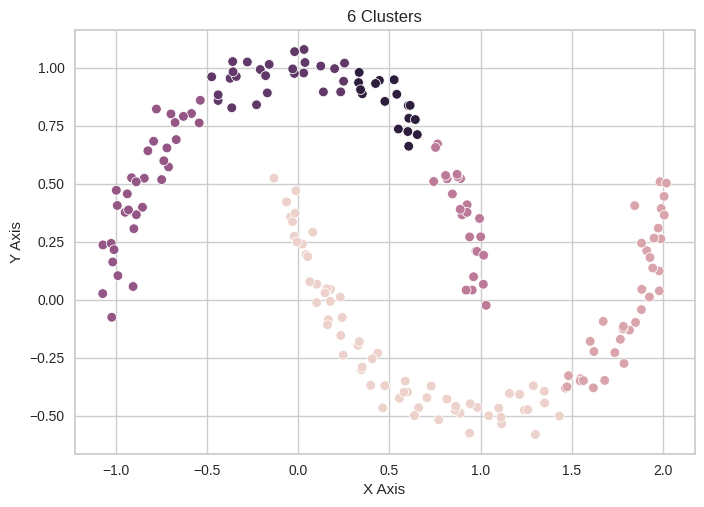

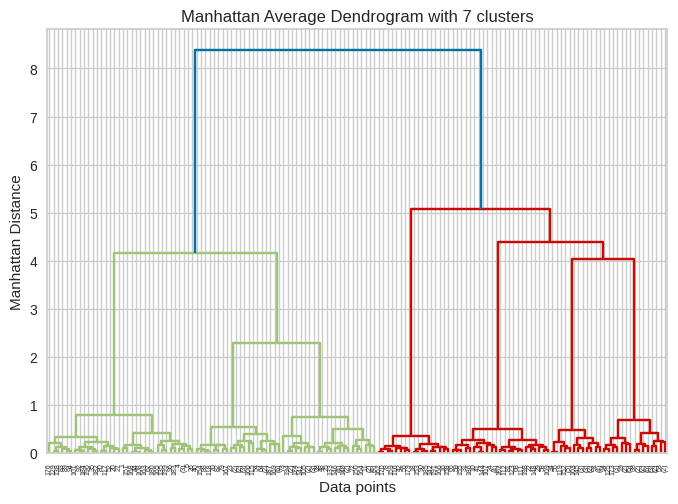

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


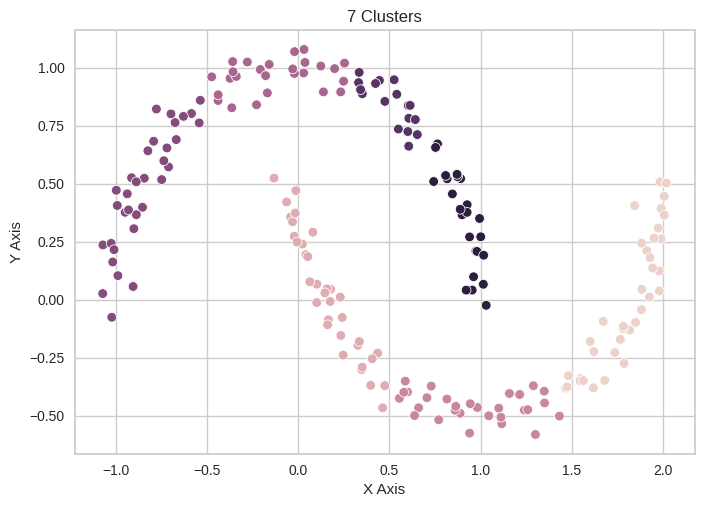

In [27]:
# Hierarchical clustering with Manhattan distance and Ward linkage
for number in [4,5,6,7]:
  manhattan_avg = linkage(data, method='average', metric='cityblock')
  plt.title('Manhattan Average Dendrogram with '+ str(number) + ' clusters')
  dendrogram(manhattan_avg,p=number,truncate_mode='level')
  plt.xlabel('Data points')
  plt.ylabel('Manhattan Distance')
  plt.show()

  ma_clust= AgglomerativeClustering(n_clusters=number, affinity="manhattan", linkage="average")
  data4=data
  ma_clust.fit(data4.values)
  data4["Cluster_Number_ma"] = ma_clust.labels_
  plt.title(str(number) +' Clusters')
  sns.scatterplot(x="X", y="Y", data=data, hue="Cluster_Number_ma",legend=False,alpha=1)
  plt.xlabel('X Axis')
  plt.ylabel('Y Axis')
  plt.show()
  print("====================================================================================================================================================")
  print("====================================================================================================================================================")
  print("====================================================================================================================================================")

From above dendrograms and clusters, we can say that for 4 clusters in euclidian ward has the largest distance you can move without touching one of the horizontal bars
This also proves our assumption that there can be 4 clusters in the dataset.



## **1.3.3 Part 2C: **
Heard of Spectral clustering? It uses the graph of nearest neighbors to compute a higher dimensional representation of the data, and then assigns labels using a k-means algorithm.

Apply spectral clustering on the data for k=2 and plot the results. Comment on the result and
compare it to above results.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


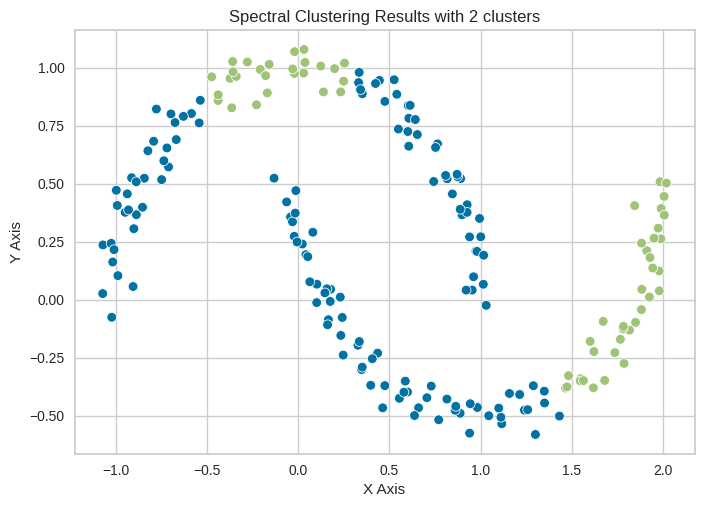

In [28]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Applying Spectral Clustering with k=2
spectral_cluster = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=123)
data['Cluster_Number_spectral'] = spectral_cluster.fit_predict(data.values)

# Plotting the results
plt.title('Spectral Clustering Results with 2 clusters')
sns.scatterplot(x="X", y="Y", data=data, hue="Cluster_Number_spectral", legend=False, alpha=1)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()




Cluster_Number_spectral: Represents the cluster assignment provided by the Spectral Clustering algorithm.
Cluster Assignments:

The column Cluster_Number_spectral contains values of 0 or 1, indicating the cluster assignment for each data point.
For instance, if Cluster_Number_spectral is 0, the corresponding data point belongs to Cluster 0; if it's 1, the point belongs to Cluster 1.
Example Interpretation:

Let's take the first row (index 0) as an example:
X: 0.816805
Y: 0.521645
Cluster_Number_spectral: 0
This data point with coordinates (0.816805, 0.521645) is assigned to Cluster 0 by the Spectral Clustering algorithm.
Visualization:

When you plot these data points in a 2D space using X and Y coordinates, you can color them based on the assigned clusters. Each point's color in the plot corresponds to the value in the Cluster_Number_spectral column.
Summary:

The output provides a summary of the data points, their coordinates, and the cluster assignments from the Spectral Clustering algorithm. It gives you a sense of how the algorithm has grouped the data into two clusters in the 2D space defined by X and Y coordinates.

## **1.3.4 Part 2D: **
For your Selection of K, display the dendogram for the analysis and plot line where K clusters are
formed. Give proper Title

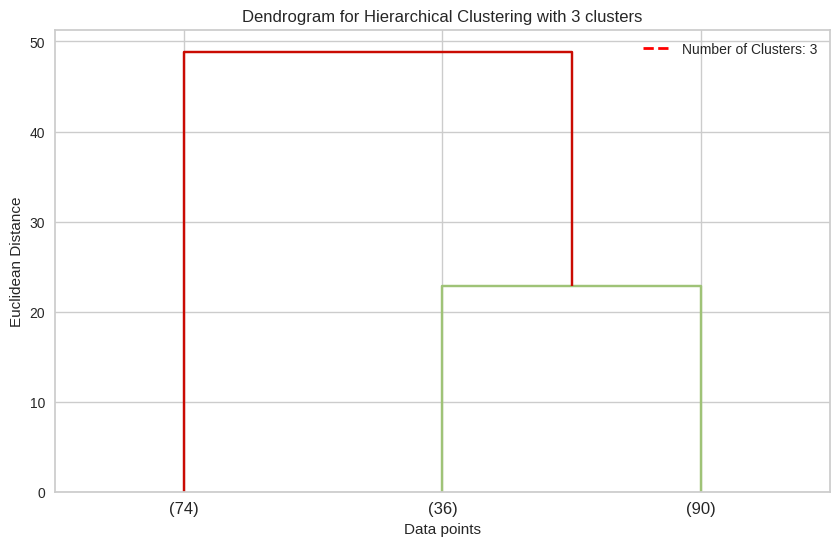

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Selecting K (number of clusters)
k = 3

# Hierarchical clustering with Euclidean distance and Ward linkage
euclid_ward = linkage(data, method='ward', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(euclid_ward, p=k, truncate_mode='lastp', show_leaf_counts=True, above_threshold_color='r')
plt.title(f'Dendrogram for Hierarchical Clustering with {k} clusters')
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=53.5, color='red', linestyle='--', linewidth=2, label=f'Number of Clusters: {k}')
plt.legend()
plt.show()


Cluster Indices: The first two columns represent the indices or labels of the clusters that are merged. For example, in the first row, clusters with indices 13 and 134 are merged.

Distance: The third column represents the distance between the merged clusters. It shows the dissimilarity or distance at which the clusters were merged. Smaller values indicate that the clusters were more similar.

Number of Points: The fourth column represents the number of points in the newly formed cluster after the merge. In hierarchical clustering, the number of points is the sum of the points in the merged clusters.


[13, 134, 0.00268113103, 2]
[6, 15, 0.00602624938, 2]
[62, 95, 0.00972376877, 2]
[44, 108, 0.0101951224, 2]
[67, 180, 0.0102729733, 2]
[162, 170, 0.0103204802, 2]
[63, 120, 0.010842555, 2]
[17, 60, 0.0108821896, 2]
[33, 76, 0.0136720879, 2]
[0, 192, 0.0165273676, 2]
[21, 49, 0.0174053515, 2]
[51, 157, 0.0176384391, 2]
...
The first row indicates that clusters with indices 13 and 134 were merged at a distance of approximately 0.0027, resulting in a new cluster with 2 points.
The second row shows the merging of clusters 6 and 15 at a distance of approximately 0.006, resulting in a new cluster with 2 points.
The process continues, with clusters being merged based on their proximity until there is only one cluster remaining.
You can use this linkage matrix to visualize the dendrogram, which is a tree-like diagram representing the hierarchy of clusters formed during the agglomerative clustering process. The dendrogram helps in understanding the relationships and structure of the clusters.






